In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

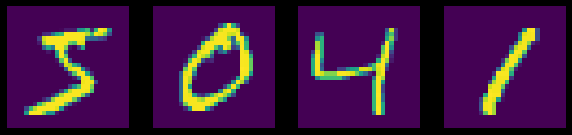

In [8]:
#data preprocessing
#Load the "mnist_train.csv" dataset.
data = pd.read_csv("mnist_train.csv")

print(data)
print(data.dtypes)
print("data set shape:", data.shape)
print('----------------------')

x = data.drop(columns=['label'])
y = data['label']


num_classes = y.nunique()
print("Number of unique classes:",num_classes)
print('----------------------')

num_features = len(x.columns)
print("Number of features (pixels):", num_features)
print('----------------------')

# Check whether there are missing values
missing_values = data.isnull().sum()
print('Missing values:')
print(missing_values)
print('----------------------')

#Normalize each image by dividing each pixel by 255.
x=x/255


resized_image=[]
for i in range(len(x)):
    img = np.array(x.loc[i]).reshape(28, 28)
    resized_img = resize(img, (28, 28))
    resized_image.append(resized_img.flatten())

fig, axes = plt.subplots(1,4 , figsize=(10, 3))
for i in range(4):
    img = resized_image[i].reshape(28, 28)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [9]:
#Traning a Neural network
from sklearn.neural_network import MLPClassifier

# Define the first ANN architecture
ann1 = MLPClassifier(
    hidden_layer_sizes=(100,), 
    max_iter=500,  
    random_state=100
)


In [11]:
# Train the first ANN
ann1.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=100)

In [12]:
# Evaluate the first ANN on the validation set
y_pred_ann1 = ann1.predict(x_test)

In [14]:
accuracy_ann1 = accuracy_score(y_test, y_pred_ann1)
print("Accuracy (ANN1):", (accuracy_ann1*100), "%")

Accuracy (ANN1): 97.175 %


In [15]:
# Define the second ANN architecture with different hyperparameters
ann2 = MLPClassifier(
    hidden_layer_sizes=(50,),    # Single hidden layer with 50 neurons
    learning_rate_init=0.01,      # Initial learning rate
    batch_size=128,               # Batch size
    max_iter=500,                 # Maximum number of iterations
    random_state=100
)

In [16]:
# Train the second ANN
ann2.fit(x_train, y_train)

MLPClassifier(batch_size=128, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              max_iter=500, random_state=100)

In [17]:
# Evaluate the second ANN on the validation set
y_pred_ann2 = ann2.predict(x_test)

In [18]:
accuracy_ann2 = accuracy_score(y_test, y_pred_ann2)
print("Accuracy (ANN2):", (accuracy_ann2*100), "%")

Accuracy (ANN2): 96.64166666666667 %


In [19]:
# Choose the best model based on validation accuracy
best_ann = ann1 if accuracy_ann1 >= accuracy_ann2 else ann2
print("Best ANN architecture:", "ANN1" if accuracy_ann1 >= accuracy_ann2 else "ANN2")

Best ANN architecture: ANN1


In [20]:
# Print a report for the best ANN on the testing data
report_test = classification_report(y_test, best_ann.predict(x_test))
print("Classification Report (Testing Data):\n", report_test)

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1185
           1       0.99      0.99      0.99      1365
           2       0.97      0.97      0.97      1152
           3       0.96      0.98      0.97      1247
           4       0.98      0.96      0.97      1196
           5       0.97      0.96      0.97      1089
           6       0.99      0.97      0.98      1198
           7       0.96      0.98      0.97      1230
           8       0.97      0.96      0.96      1206
           9       0.94      0.97      0.96      1132

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [21]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix of the best model
conf_matrix_ann = confusion_matrix(y_test, best_ann.predict(x_test))
print("Confusion Matrix (Best ANN):\n", conf_matrix_ann)

Confusion Matrix (Best ANN):
 [[1160    1    3    3    2    2    2    3    7    2]
 [   0 1348    3    3    1    1    1    2    3    3]
 [   2    2 1114    8    3    0    2   15    4    2]
 [   0    0    6 1216    0    6    0    9    5    5]
 [   1    4    3    1 1151    0    3    6    0   27]
 [   0    0    4   18    1 1045    4    5    6    6]
 [   5    2    1    2    5    7 1168    2    6    0]
 [   1    5    4    4    3    1    1 1204    1    6]
 [   1    2    7   14    2    6    2    3 1156   13]
 [   5    1    0    4    6    4    0    9    4 1099]]


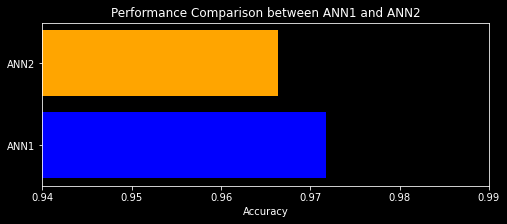

In [32]:
# Plot the performance comparison as a horizontal bar plot with a smaller y-axis scale
labels = ['ANN1', 'ANN2']
accuracies = [accuracy_ann1, accuracy_ann2]

plt.figure(figsize=(8, 3))  # Smaller height for the plot
plt.barh(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Accuracy')
plt.title('Performance Comparison between ANN1 and ANN2')
plt.xlim(0.94, 0.99)  # Adjusted x-axis limit to focus on differences
plt.show()